# TRANSFER FUNCTIONS FOR SBML MODELS

# Preliminaries

This notebook explores the construction of transfer functions for an SBML model. This is done numerically, and so only the DC gain and poles are reported.

In [77]:
from collections import OrderedDict
import numpy as np
import pandas as pd
import tellurium as te
import sympy as sp
from scipy import signal
import matplotlib.pyplot as plt

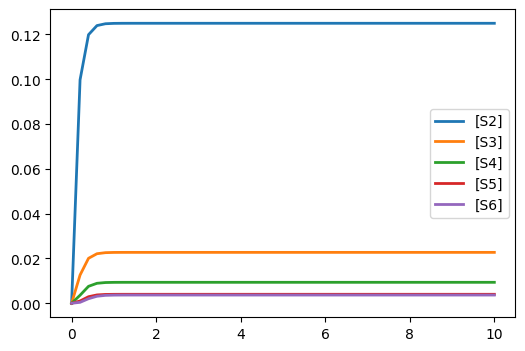

In [62]:
MODEL = """
$S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> ; k4*S3
S1 -> ; k5*S1
S2 -> ; k6*S2
S3 -> S4; k7*S3
S4 -> ; k8*S4
S4 -> S5; k9*S4
S5 -> ; k10*S5
S5 -> S6; k11*S5
S6 -> ; k12*S6

S1 = 1
S2 = 0
S3 = 0
"""
constants = [f"k{str(v)} = {v}" for v in range(1, 13)]
MODEL = MODEL + "\n".join(constants)
rr = te.loada(MODEL)
rr.simulate(0, 10)
rr.plot()

# Calculating Step Response from Simulation

Procedure
1. Set input boundary species to 1
2. Do steady state simulation
3. Report the steady state value of the output

In [58]:
rr.reset()
rr['S1'] = 1
rr.steadyState()
rr['S6']

0.8533333333333334

# Analytical calculation

In [65]:
A = rr.getFullJacobian()
A

      S2,  S3,  S4,  S5,  S6
S2 [[ -8,   0,   0,   0,   0],
S3  [  2, -11,   0,   0,   0],
S4  [  0,   7, -17,   0,   0],
S5  [  0,   0,   9, -21,   0],
S6  [  0,   0,   0,  11, -12]]

In [ ]:
def makeSymbolicAMatrix(num_species):
    """
    """


In [66]:
s, u, k = sp.symbols(["s", "u", "k"])
A = sp.Matrix(A)  # or convert from numpy: sp.Matrix(A_numpy)
B = sp.Matrix([[1], [0], [0], [0], [0]])
x = sp.MatrixSymbol('x', np.shape(A)[0], 1)

In [67]:
A[1,0] = k
A

Matrix([
[-8.00000000000001,              0.0,               0.0,               0.0,   0.0],
[                k,            -11.0,               0.0,               0.0,   0.0],
[              0.0, 6.99999999999997, -17.0000000000001,               0.0,   0.0],
[              0.0,              0.0,  9.00000000000002, -20.9999999999999,   0.0],
[              0.0,              0.0,               0.0,              11.0, -12.0]])

In [68]:
A*x + B*u

Matrix([
[u],
[0],
[0],
[0],
[0]]) + Matrix([
[-8.00000000000001,              0.0,               0.0,               0.0,   0.0],
[                k,            -11.0,               0.0,               0.0,   0.0],
[              0.0, 6.99999999999997, -17.0000000000001,               0.0,   0.0],
[              0.0,              0.0,  9.00000000000002, -20.9999999999999,   0.0],
[              0.0,              0.0,               0.0,              11.0, -12.0]])*x

In [69]:
(s*sp.eye(np.shape(A)[0]) - A).inv()

Matrix([
[            (1.0*s**4 + 61.0*s**3 + 1363.0*s**2 + 13227.0*s + 47124.0)/(1.0*s**5 + 69.0*s**4 + 1851.0*s**3 + 24131.0*s**2 + 152940.0*s + 376992.0),                                                                                                                                                                   0,                                                                                                                                                                              0,                                                                                                                                                                              0,                                                                                                                                      0],
[(1.0*k*s**3 + 50.0*k*s**2 + 813.000000000002*k*s + 4284.00000000001*k)/(1.0*s**5 + 69.0*s**4 + 1851.0*s**3 + 24131.0*s**2 + 152940.0*s + 376992.0),                     (1.0*s**4 + 58.0*s*

In [59]:
8/9.375

0.8533333333333334

# Transfer functions

TransferFunctionContinuous(
array([1., 1.]),
array([1., 2., 3.]),
dt: None
)


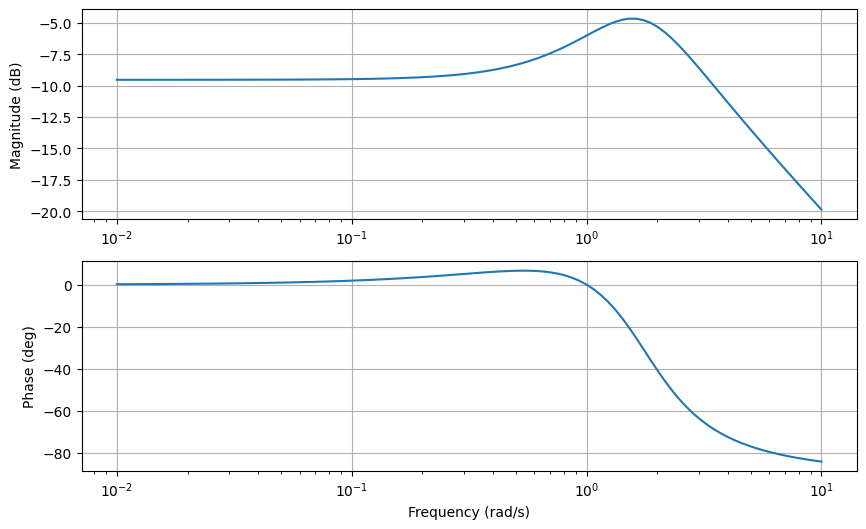

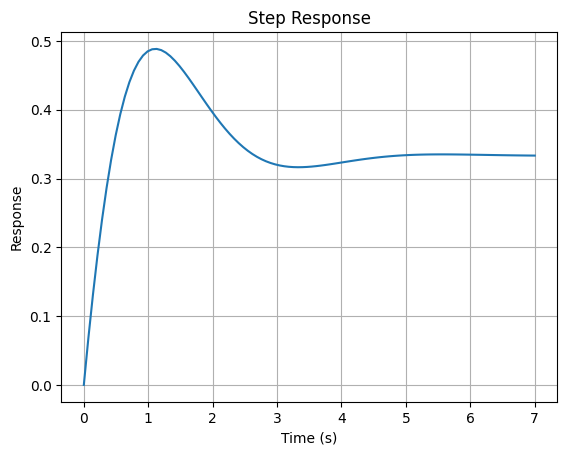

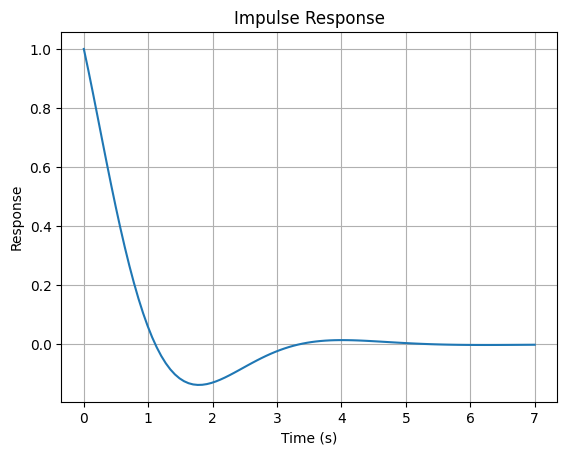

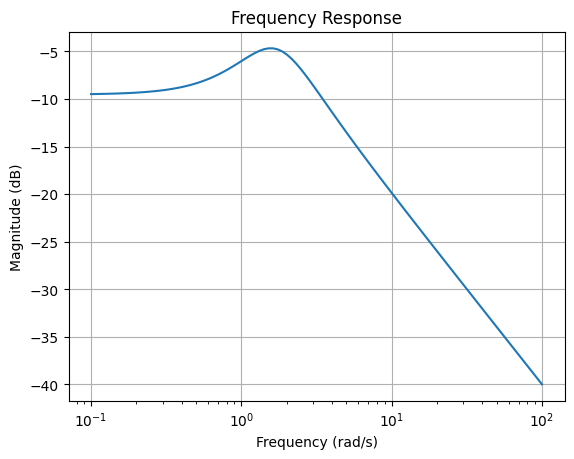

In [70]:


# Define a transfer function: H(s) = (s + 1) / (s^2 + 2s + 3)
# Numerator coefficients: s + 1 → [1, 1]
# Denominator coefficients: s^2 + 2s + 3 → [1, 2, 3]
num = [1, 1]
den = [1, 2, 3]

sys = signal.TransferFunction(num, den)

print(sys)
# Output shows the transfer function representation

# Bode plot
w, mag, phase = signal.bode(sys)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.ylabel('Magnitude (dB)')
plt.grid()

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')
plt.grid()
plt.show()

# Step response
t, y = signal.step(sys)
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response')
plt.grid()
plt.show()

# Impulse response
t, y = signal.impulse(sys)
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Impulse Response')
plt.grid()
plt.show()

# Frequency response at specific frequencies
w = np.logspace(-1, 2, 100)  # from 0.1 to 100 rad/s
w_resp, H = signal.freqs(num, den, w)
plt.figure()
plt.semilogx(w_resp, 20*np.log10(np.abs(H)))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response')
plt.grid()
plt.show()

# Transfer function for example in slides

In [132]:
k2, k3, k4, k5 = sp.symbols(["k2", "k3", "k4", "k5"])
A = sp.Matrix([ [0, 0, 0], [2*k2, -k3-k4, k3], [k2, k3, -k5]])
A

Matrix([
[   0,        0,   0],
[2*k2, -k3 - k4,  k3],
[  k2,       k3, -k5]])

In [133]:
s, u = sp.symbols(["s", "u"])
A = sp.Matrix(A)  # or convert from numpy: sp.Matrix(A_numpy)
u = sp.Matrix([1, 0, 0])

In [138]:
x = (s*sp.eye(np.shape(A)[0]) - A).inv()*u
sp.simplify(s*x)

Matrix([
[                                                                        1],
[k2*(k3 + 2*k5 + 2*s)/(-k3**2 + k3*k5 + k3*s + k4*k5 + k4*s + k5*s + s**2)],
[  k2*(3*k3 + k4 + s)/(-k3**2 + k3*k5 + k3*s + k4*k5 + k4*s + k5*s + s**2)]])

## Tellurium simulations

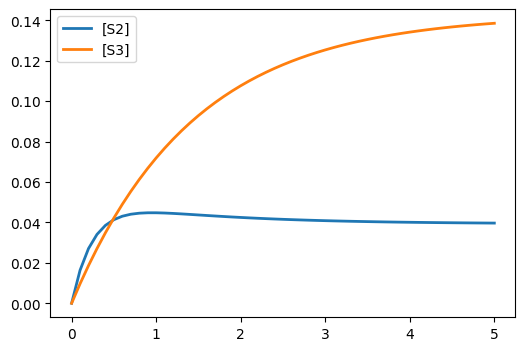

In [131]:
MODEL = """
-> S1; k1
S1 -> 2 S2 + S3; k2*S1
S2 -> S3; k3*S3
S2 ->   ; k4*S2
S3 -> ; k5*S3
k1=1; k2=0.02; k3=0.3; k4=4; k5=1
$S1 = 5
S2 = 0
S3 = 0
"""
rr = te.loada(MODEL)
rr.simulate()
rr.plot()

# Evaluating derived transfer functions

In [79]:
def dcgain(tf: signal._ltisys.TransferFunctionContinuous) -> float:
    return tf.num[-1]/tf.den[-1]

In [80]:
tf = signal.TransferFunction([692*2], [1, 69, 1851, 21431, 152940, 376992])
dcgain(tf)

0.0036711654358713183

In [81]:
tf12 = signal.TransferFunction([1, 61, 1363, 13227, 47124], [1, 69, 1851, 24131, 152940, 376992])
dcgain(tf12)

0.125

In [95]:
tv, yv = signal.step(tf12, T=np.arange(0, 10, 0.1))

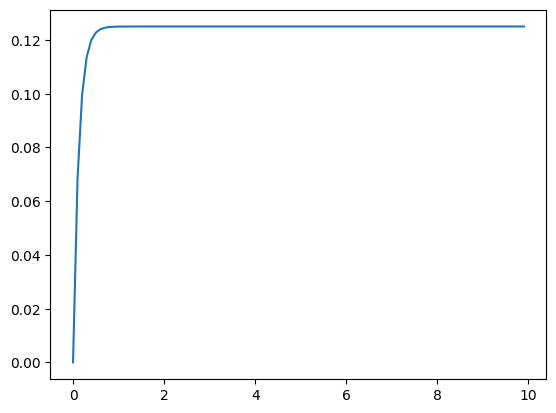

In [96]:
plt.plot(tv, yv)

# Convert sympy to signal.TransferFunction

Example 1:
TransferFunctionContinuous(
array([1., 1.]),
array([1., 2., 3.]),
dt: None
)

Example 2:
TransferFunctionContinuous(
array([2., 1.]),
array([1., 3., 2.]),
dt: None
)

Example 3:
TransferFunctionContinuous(
array([1., 2.]),
array([1., 3., 1.]),
dt: None
)



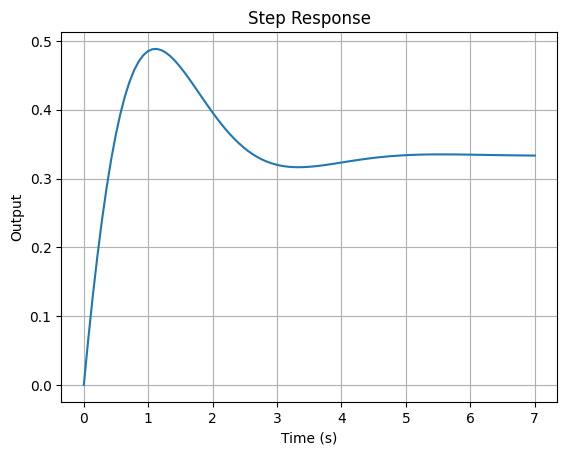

In [97]:
import sympy as sp
import numpy as np
from scipy import signal

def sympy_to_transfer_function(expr, s):
    """
    Convert a SymPy rational expression in s to a scipy TransferFunction.
    
    Parameters:
    -----------
    expr : sympy expression
        Rational polynomial expression in variable s
    s : sympy Symbol
        The Laplace variable
        
    Returns:
    --------
    sys : scipy.signal.TransferFunction
        Transfer function object
    """
    # Simplify and get numerator and denominator
    expr = sp.simplify(expr)
    numer, denom = sp.fraction(expr)
    
    # Convert to polynomials
    numer_poly = sp.Poly(numer, s)
    denom_poly = sp.Poly(denom, s)
    
    # Extract coefficients (from highest to lowest degree)
    numer_coeffs = [float(c) for c in numer_poly.all_coeffs()]
    denom_coeffs = [float(c) for c in denom_poly.all_coeffs()]
    
    # Create transfer function
    sys = signal.TransferFunction(numer_coeffs, denom_coeffs)
    
    return sys


# Example usage
s = sp.Symbol('s')

# Example 1: Simple transfer function
# H(s) = (s + 1) / (s^2 + 2*s + 3)
expr1 = (s + 1) / (s**2 + 2*s + 3)
sys1 = sympy_to_transfer_function(expr1, s)
print("Example 1:")
print(sys1)
print()

# Example 2: More complex
# H(s) = (2*s^2 + 3*s + 1) / (s^3 + 4*s^2 + 5*s + 2)
expr2 = (2*s**2 + 3*s + 1) / (s**3 + 4*s**2 + 5*s + 2)
sys2 = sympy_to_transfer_function(expr2, s)
print("Example 2:")
print(sys2)
print()

# Example 3: With symbolic parameters that get substituted
alpha, beta = sp.symbols('alpha beta', positive=True, real=True)
expr3 = (s + alpha) / (s**2 + beta*s + 1)

# Substitute values
expr3_numeric = expr3.subs({alpha: 2, beta: 3})
sys3 = sympy_to_transfer_function(expr3_numeric, s)
print("Example 3:")
print(sys3)
print()

# Verify with step response
import matplotlib.pyplot as plt

t, y = signal.step(sys1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid()
plt.show()

# General construction of the symbolic Jacobian

In [103]:
def makeSymbolicJacobian(antimony_str: str):
    """
    Convert an Antimony model to a symbolic Jacobian matrix.
    
    Parameters:
    -----------
    antimony_str: String for an Antimony model
        Path to Antimony file
        
    Returns:
    --------
    jacobian : sympy.Matrix
        Symbolic Jacobian matrix where J[i,j] = d(rate_i)/d(species_j)
    param_dict : dict
        Dictionary mapping parameter names to their values
        
    Notes:
    ------
    Assumes reactions have 0 or 1 reactant with unit stoichiometry.
    Kinetics are mass action (k*S) if 1 reactant, or fixed rate (k) if 0 reactants.
    """
    # Load with tellurium and convert to SBML
    r = te.loada(antimony_str)
    sbml_str = r.getSBML()
    
    # Parse SBML
    import libsbml
    reader = libsbml.SBMLReader()
    document = reader.readSBMLFromString(sbml_str)
    
    if document.getNumErrors() > 0:
        print("Errors in SBML conversion:")
        document.printErrors()
        raise ValueError("Failed to convert Antimony to SBML")
    
    model = document.getModel()
    
    # Get species and create symbols
    species_list = []
    species_symbols = {}
    for i in range(model.getNumSpecies()):
        species = model.getSpecies(i)
        species_id = species.getId()
        # Skip boundary/constant species
        #if not species.getBoundaryCondition() and not species.getConstant():
        species_list.append(species_id)
        species_symbols[species_id] = sp.Symbol(species_id)
    
    num_species = len(species_list)
    
    # Get parameters and create symbols and dictionary
    param_dict = {}
    param_symbols = {}
    for i in range(model.getNumParameters()):
        param = model.getParameter(i)
        param_id = param.getId()
        param_value = param.getValue()
        param_dict[param_id] = param_value
        param_symbols[param_id] = sp.Symbol(param_id)
    
    # Also get local parameters from reactions. Construct symbols.
    for i in range(model.getNumReactions()):
        reaction = model.getReaction(i)
        kinetic_law = reaction.getKineticLaw()
        if kinetic_law:
            for j in range(kinetic_law.getNumParameters()):
                param = kinetic_law.getParameter(j)
                param_id = param.getId()
                param_value = param.getValue()
                param_dict[param_id] = param_value
                param_symbols[param_id] = sp.Symbol(param_id)
    
    # Initialize rate equations for each species
    rate_equations = {species_id: sp.Integer(0) for species_id in species_list}
    
    # Process each reaction
    for i in range(model.getNumReactions()):
        reaction = model.getReaction(i)
        reaction_id = reaction.getId()
        
        # Get reactants (should be 0 or 1)
        num_reactants = reaction.getNumReactants()
        if num_reactants > 1:
            raise ValueError(f"Reaction {reaction_id} has {num_reactants} reactants. Only 0 or 1 allowed.")
        
        reactant_id = None
        if num_reactants == 1:
            reactant = reaction.getReactant(0)
            if reactant.getStoichiometry() != 1:
                raise ValueError(f"Reaction {reaction_id} has non-unit stoichiometry")
            reactant_id = reactant.getSpecies()
        
        # Get products
        product_stoichiometry = {}
        for j in range(reaction.getNumProducts()):
            product = reaction.getProduct(j)
            product_id = product.getSpecies()
            stoich = product.getStoichiometry()
            product_stoichiometry[product_id] = stoich
        
        # Get rate constant from kinetic law
        kinetic_law = reaction.getKineticLaw()
        if not kinetic_law:
            raise ValueError(f"Reaction {reaction_id} has no kinetic law")
        
        # Parse the kinetic law to extract the rate constant
        math_ast = kinetic_law.getMath()
        rate_formula_str = libsbml.formulaToL3String(math_ast)
        
        # Extract rate constant and build mass action rate
        rate_constant_symbol = extract_rate_constant(
            rate_formula_str, 
            reactant_id, 
            param_symbols, 
            species_symbols,
            reaction_id
        )
        
        # Build rate expression based on mass action kinetics
        if reactant_id is None:
            # No reactant: fixed rate k
            rate_expr = rate_constant_symbol
        else:
            # One reactant: mass action k*S
            rate_expr = rate_constant_symbol * species_symbols[reactant_id]
        
        # Update rate equations
        # Reactant is consumed
        if reactant_id and reactant_id in species_list:
            rate_equations[reactant_id] -= rate_expr
        
        # Products are produced
        for product_id, stoich in product_stoichiometry.items():
            if product_id in species_list:
                rate_equations[product_id] += stoich * rate_expr
    
    # Create ODE matrix (column vector)
    ode_matrix = sp.Matrix([rate_equations[species_id] for species_id in species_list])
    
    # Compute Jacobian matrix
    # J[i,j] = d(f_i)/d(x_j) where f_i is the rate equation for species i
    species_vector = sp.Matrix([species_symbols[species_id] for species_id in species_list])
    jacobian = ode_matrix.jacobian(species_vector)
    
    return jacobian, param_dict


def extract_rate_constant(formula_str, reactant_id, param_symbols, species_symbols, reaction_id):
    """
    Extract the rate constant from the kinetic law formula.
    
    Expects either:
    - "k" for zero-reactant reactions
    - "k * S" or "S * k" for single-reactant reactions
    
    Parameters:
    -----------
    formula_str : str
        SBML formula as string
    reactant_id : str or None
        Species ID of the reactant (None if no reactant)
    param_symbols : dict
        Mapping from parameter IDs to SymPy symbols
    species_symbols : dict
        Mapping from species IDs to SymPy symbols
    reaction_id : str
        Reaction ID for error messages
        
    Returns:
    --------
    rate_constant : sympy.Symbol
        The rate constant symbol
    """
    # Parse the formula
    all_symbols = {**species_symbols, **param_symbols}
    formula_str = formula_str.replace('^', '**')
    
    try:
        expr = sp.sympify(formula_str, locals=all_symbols)
    except Exception as e:
        raise ValueError(f"Error parsing kinetic law for reaction {reaction_id}: {formula_str}") from e
    
    if reactant_id is None:
        # Zero reactant: formula should just be the rate constant
        if expr in param_symbols.values():
            return expr
        else:
            # The expression might be a number or more complex
            # Try to find a parameter in it
            params_in_expr = [sym for sym in expr.free_symbols if sym in param_symbols.values()]
            if len(params_in_expr) == 1:
                return params_in_expr[0]
            elif len(params_in_expr) == 0:
                raise ValueError(f"Reaction {reaction_id}: No parameter found in kinetic law {formula_str}")
            else:
                raise ValueError(f"Reaction {reaction_id}: Multiple parameters in kinetic law {formula_str}")
    else:
        # One reactant: formula should be k*S
        # Divide by the reactant to get the rate constant
        reactant_symbol = species_symbols[reactant_id]
        
        # Try to extract rate constant by dividing
        if reactant_symbol in expr.free_symbols:
            # Simplify k*S / S = k
            rate_constant = sp.simplify(expr / reactant_symbol)
            
            # Check that the result doesn't contain the reactant anymore
            if reactant_symbol in rate_constant.free_symbols:
                raise ValueError(f"Reaction {reaction_id}: Kinetic law {formula_str} is not mass action")
            
            return rate_constant
        else:
            raise ValueError(f"Reaction {reaction_id}: Kinetic law {formula_str} doesn't contain reactant {reactant_id}")


# Example usage and testing
def create_example_antimony():
    """
    Create a simple example Antimony model for testing.
    Chain reaction: -> S -> E -> P
    """
    antimony_str = '''
model example_model
  # Species
  $S = 10;
  E = 0;
  P = 0;
  Q = 0;
  
  # Parameters
  k0 = 0.5;
  k1 = 0.1;
  k2 = 0.05;
  k3 = 1;
  
  # Reactions
  r0: -> S; k0;
  r1: S -> E; k1*S;
  r2: E -> 2P; k2*E;
  r3: S -> Q; k3*S
end
'''
    
    # Save to file
    with open('example_model.ant', 'w') as f:
        f.write(antimony_str)
    
    return 'example_model.ant'


# Test the function
if __name__ == "__main__":
    # Create example Antimony file
    antimony_file = create_example_antimony()
    
    # Convert to Jacobian
    jacobian, param_dict = antimony_to_jacobian(antimony_file)
    
    print("Symbolic Jacobian Matrix:")
    print(jacobian)
    print("\n")
    
    print("Parameter Dictionary:")
    for param, value in param_dict.items():
        print(f"  {param} = {value}")
    print("\n")
    
    # Display Jacobian elements
    print("Jacobian Elements:")
    species = ['S', 'E', 'P']
    for i, row_species in enumerate(species):
        for j, col_species in enumerate(species):
            print(f"  J[{row_species},{col_species}] = {jacobian[i,j]}")
    print("\n")
    

Symbolic Jacobian Matrix:
Matrix([[-k1 - k3, 0, 0, 0], [1.0*k1, -k2, 0, 0], [0, 2.0*k2, 0, 0], [1.0*k3, 0, 0, 0]])


Parameter Dictionary:
  k0 = 0.5
  k1 = 0.1
  k2 = 0.05
  k3 = 1.0


Jacobian Elements:
  J[S,S] = -k1 - k3
  J[S,E] = 0
  J[S,P] = 0
  J[E,S] = 1.0*k1
  J[E,E] = -k2
  J[E,P] = 0
  J[P,S] = 0
  J[P,E] = 2.0*k2
  J[P,P] = 0




# CRN Builder

In [141]:
import random
import numpy as np

def generate_crn(
    num_reactions,
    num_products_bounds=(1, 3),
    kinetic_constant_bounds=(0.1, 10.0),
    stoichiometry_bounds=(1, 3),
    seed=None
):
    """
    Generate a random chemical reaction network in Antimony language.
    
    Parameters:
    -----------
    num_reactions : int
        Total number of reactions to generate
    num_products_bounds : tuple of (int, int)
        (min, max) number of products per reaction
    kinetic_constant_bounds : tuple of (float, float)
        (min, max) values for kinetic rate constants
    stoichiometry_bounds : tuple of (int, int)
        (min, max) stoichiometry coefficients for product species
    seed : int, optional
        Random seed for reproducibility
        
    Returns:
    --------
    str : Antimony model string
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    if num_reactions < 1:
        raise ValueError("Must have at least 1 reaction")
    
    antimony_lines = []
    antimony_lines.append("# Random Chemical Reaction Network")
    antimony_lines.append("# Generated with specified constraints\n")
    antimony_lines.append("model random_crn()\n")
    
    # Track existing species and rate constants
    existing_species = set()
    species_counter = 1
    rate_constants = []
    
    # Reaction 1: No reactant, S1 is product
    k1 = np.random.uniform(kinetic_constant_bounds[0], kinetic_constant_bounds[1])
    rate_constants.append(("k1", k1))
    antimony_lines.append(f"  # Reaction 1")
    antimony_lines.append(f"  -> S1; k1")
    existing_species.add("S1")
    species_counter = 2
    
    # Generate subsequent reactions
    for rxn_idx in range(2, num_reactions + 1):
        antimony_lines.append(f"\n  # Reaction {rxn_idx}")
        
        # Pick a random reactant from existing species
        reactant = random.choice(list(existing_species))
        
        # Determine number of products
        num_products = random.randint(num_products_bounds[0], num_products_bounds[1])
        
        # Generate products
        products = []
        for _ in range(num_products):
            # Decide whether to use existing species or create new one
            # Bias towards creating new species early on, existing species later
            if len(existing_species) < 3 or random.random() < 0.5:
                # Create new species
                new_species = f"S{species_counter}"
                existing_species.add(new_species)
                species_counter += 1
                product_species = new_species
            else:
                # Use existing species
                product_species = random.choice(list(existing_species))
            
            # Assign stoichiometry
            stoich = random.randint(stoichiometry_bounds[0], stoichiometry_bounds[1])
            products.append((stoich, product_species))
        
        # Generate kinetic constant
        k = np.random.uniform(kinetic_constant_bounds[0], kinetic_constant_bounds[1])
        k_name = f"k{rxn_idx}"
        rate_constants.append((k_name, k))
        
        # Build reaction string with spaces between stoichiometry and species
        product_str = " + ".join([f"{s} {sp}" if s > 1 else sp for s, sp in products])
        rate_law = f"{k_name} * {reactant}"
        
        antimony_lines.append(f"  {reactant} -> {product_str}; {rate_law}")
    
    # Add rate constant definitions
    antimony_lines.append("\n  # Rate constants")
    for k_name, k_value in rate_constants:
        antimony_lines.append(f"  {k_name} = {k_value:.4f}")
    
    # Add species initialization
    antimony_lines.append("\n  # Species initialization")
    for species in sorted(existing_species, key=lambda x: int(x[1:])):
        antimony_lines.append(f"  {species} = 0")
    
    antimony_lines.append("\nend")
    
    return "\n".join(antimony_lines)


# Example usage
if __name__ == "__main__":
    # Generate a random CRN with 10 reactions
    model = generate_random_crn(
        num_reactions=10,
        num_products_bounds=(1, 3),
        kinetic_constant_bounds=(0.1, 10.0),
        stoichiometry_bounds=(1, 3),
        seed=42  # For reproducibility
    )
    
    print(model)
    print("\n" + "="*60 + "\n")
    
    # Generate another example with different parameters
    model2 = generate_random_crn(
        num_reactions=5,
        num_products_bounds=(1, 2),
        kinetic_constant_bounds=(0.5, 5.0),
        stoichiometry_bounds=(1, 2),
        seed=123
    )
    
    print(model2)


# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Reaction 1
  -> S1; k1

  # Reaction 2
  S1 -> 3 S2; k2 * S1

  # Reaction 3
  S1 -> S3; k3 * S1

  # Reaction 4
  S3 -> 3 S4 + 3 S3 + S5; k4 * S3

  # Reaction 5
  S4 -> 3 S6; k5 * S4

  # Reaction 6
  S6 -> 3 S7 + S7 + 2 S8; k6 * S6

  # Reaction 7
  S6 -> 2 S1; k7 * S6

  # Reaction 8
  S4 -> S1; k8 * S4

  # Reaction 9
  S8 -> 2 S9 + 3 S6; k9 * S8

  # Reaction 10
  S5 -> 2 S10 + 2 S11 + 2 S5; k10 * S5

  # Rate constants
  k1 = 3.8079
  k2 = 9.5121
  k3 = 7.3467
  k4 = 6.0267
  k5 = 1.6446
  k6 = 1.6443
  k7 = 0.6750
  k8 = 8.6751
  k9 = 6.0510
  k10 = 7.1099

  # Species initialization
  S1 = 0
  S2 = 0
  S3 = 0
  S4 = 0
  S5 = 0
  S6 = 0
  S7 = 0
  S8 = 0
  S9 = 0
  S10 = 0
  S11 = 0

end


# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Reaction 1
  -> S1; k1

  # Reaction 2
  S1 -> S2 + 2 S3; k2 * S1

  # Reaction 3
  S2 -> 2 S3;